# Analyse Exploratoire — Climat et Tourisme

Analyse des conditions météo par ville et par mois afin de repérer les périodes idéales pour le tourisme.


### Étape 1: Chargement des bibliothèques et configuration de l'affichage


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
sns.set(style='whitegrid')

pd.set_option('display.max_columns', None)


### Étape 2: Chargement des données depuis les fichiers CSV et aperçu des premières lignes


In [2]:
city = pd.read_csv("../data/star_schema/City.csv")
date = pd.read_csv("../data/star_schema/Date.csv")
weather = pd.read_csv("../data/star_schema/Weather.csv")

display(city.head()), 
display(date.head()), 
display(weather.head())


,City_Id,City_Name
0,1,Antananarivo
1,2,Paris


,Date_Id,Date,Day,Month,Year,Day_Week,Week_Number
0,20250525,2025-05-25,25,5,2025,Sunday,21
1,20250526,2025-05-26,26,5,2025,Monday,22
2,20250527,2025-05-27,27,5,2025,Tuesday,22
3,20250528,2025-05-28,28,5,2025,Wednesday,22
4,20250529,2025-05-29,29,5,2025,Thursday,22


,Date_Id,City_Id,Temperature,Wind_Speed,Rain,Score
0,20250525,1,14,17,0,9
1,20250526,1,15,13,10,7
2,20250527,1,16,12,0,9
3,20250528,1,16,10,0,10
4,20250529,1,17,12,0,9


### Étape 3: Fusion des données météo, ville et date avec ajout du nom du mois

In [3]:

weather_full = weather.merge(city, on="City_Id")
weather_full = weather_full.merge(date, on="Date_Id")

weather_full['Month_Name'] = pd.to_datetime(weather_full['Date']).dt.strftime('%B')

weather_full.head()


,Date_Id,City_Id,Temperature,Wind_Speed,Rain,Score,City_Name,Date,Day,Month,Year,Day_Week,Week_Number,Month_Name
0,20250525,1,14,17,0,9,Antananarivo,2025-05-25,25,5,2025,Sunday,21,May
1,20250526,1,15,13,10,7,Antananarivo,2025-05-26,26,5,2025,Monday,22,May
2,20250527,1,16,12,0,9,Antananarivo,2025-05-27,27,5,2025,Tuesday,22,May
3,20250528,1,16,10,0,10,Antananarivo,2025-05-28,28,5,2025,Wednesday,22,May
4,20250529,1,17,12,0,9,Antananarivo,2025-05-29,29,5,2025,Thursday,22,May


In [56]:
weather_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date_Id      94 non-null     int64 
 1   City_Id      94 non-null     int64 
 2   Temperature  94 non-null     int64 
 3   Wind_Speed   94 non-null     int64 
 4   Rain         94 non-null     int64 
 5   Score        94 non-null     int64 
 6   City_Name    94 non-null     object
 7   Date         94 non-null     object
 8   Day          94 non-null     int64 
 9   Month        94 non-null     int64 
 10  Year         94 non-null     int64 
 11  Day_Week     94 non-null     object
 12  Week_Number  94 non-null     int64 
 13  Month_Name   94 non-null     object
dtypes: int64(10), object(4)
memory usage: 10.4+ KB


In [57]:
weather_full.describe()

,Date_Id,City_Id,Temperature,Wind_Speed,Rain,Score,Day,Month,Year,Week_Number
count,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.0,94.000000
mean,2.025062e+07,1.500000,18.212766,10.734043,104.755319,10.968085,15.234043,6.063830,2025.0,24.723404
std,5.392011e+01,0.502681,4.249914,4.355630,313.649647,2.856617,9.780852,0.601227,0.0,1.975137
min,2.025052e+07,1.000000,13.000000,2.000000,0.000000,7.000000,1.000000,5.000000,2025.0,21.000000
25%,2.025061e+07,1.000000,15.000000,8.000000,0.000000,9.000000,6.250000,6.000000,2025.0,23.000000
50%,2.025062e+07,1.500000,16.500000,10.000000,0.000000,10.000000,14.000000,6.000000,2025.0,25.000000
75%,2.025063e+07,2.000000,21.000000,13.750000,10.000000,13.000000,25.000000,6.000000,2025.0,26.000000
max,2.025071e+07,2.000000,32.000000,21.000000,1840.000000,16.000000,31.000000,7.000000,2025.0,28.000000


In [58]:
print("Valeurs manquantes par colonne :\n", weather_full.isnull().sum())
print("Nombre de doublons :", weather_full.duplicated().sum())


Valeurs manquantes par colonne :
 Date_Id        0
City_Id        0
Temperature    0
Wind_Speed     0
Rain           0
Score          0
City_Name      0
Date           0
Day            0
Month          0
Year           0
Day_Week       0
Week_Number    0
Month_Name     0
dtype: int64
Nombre de doublons : 0


### Étape 4: Statistiques météo par ville et mois

In [4]:
weather_monthly = weather_full.groupby(['City_Name', 'Month'])[['Temperature', 'Wind_Speed', 'Rain', 'Score']].mean().reset_index()
weather_monthly


,City_Name,Month,Temperature,Wind_Speed,Rain,Score
0,Antananarivo,5,15.571429,12.571429,1.428571,8.857143
1,Antananarivo,6,15.600000,11.466667,10.000000,9.166667
2,Antananarivo,7,14.000000,8.900000,5.100000,10.700000
3,Paris,5,18.142857,13.142857,131.428571,10.285714
4,Paris,6,21.733333,11.000000,149.666667,12.666667
5,Paris,7,21.600000,6.600000,407.600000,13.500000


### Étape 5: Visualisation dynamique du score météo moyen par mois et par ville


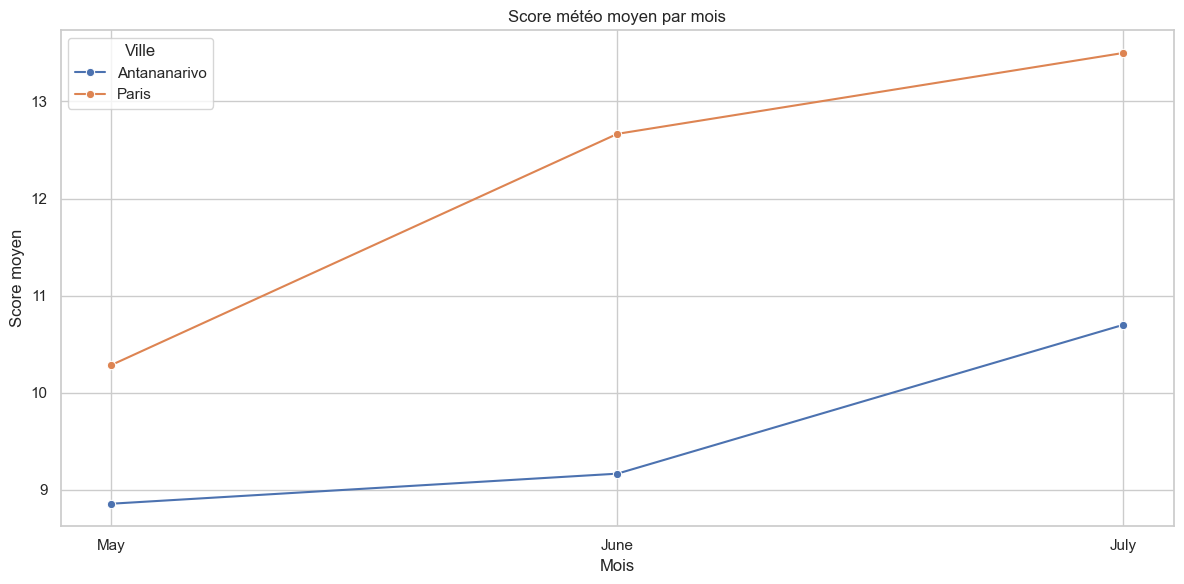

In [5]:

plt.figure(figsize=(12, 6))

monthly_score = weather_full.groupby(['Month', 'City_Name'])['Score'].mean().reset_index()

mois_presents = sorted(monthly_score['Month'].unique())

mois_labels = [calendar.month_name[m] for m in mois_presents] 

sns.lineplot(data=monthly_score, x='Month', y='Score', hue='City_Name', marker='o')

plt.title("Score météo moyen par mois")
plt.ylabel("Score moyen")
plt.xlabel("Mois")
plt.xticks(mois_presents, mois_labels)  # Afficher noms des mois présents
plt.legend(title="Ville")
plt.grid(True)
plt.tight_layout()
plt.show()


### Étape 6: Mois et villes où le climat est le plus agréable

In [54]:
score_mensuel_par_ville = weather_full.groupby(['Month', 'City_Name'])['Score'].mean().reset_index()
score_mensuel_par_ville = score_mensuel_par_ville[score_mensuel_par_ville['Score'] >= 12]
score_mensuel_par_ville['Month_Name'] = score_mensuel_par_ville['Month'].apply(lambda x: calendar.month_name[x])
score_mensuel_par_ville = score_mensuel_par_ville[['Month', 'Month_Name', 'City_Name', 'Score']]
score_mensuel_par_ville = score_mensuel_par_ville.sort_values(by='Score', ascending=False)
score_mensuel_par_ville


,Month,Month_Name,City_Name,Score
5,7,July,Paris,13.500000
3,6,June,Paris,12.666667


 ### Étape 7: Le mois avec la meilleure météo pour chaque ville

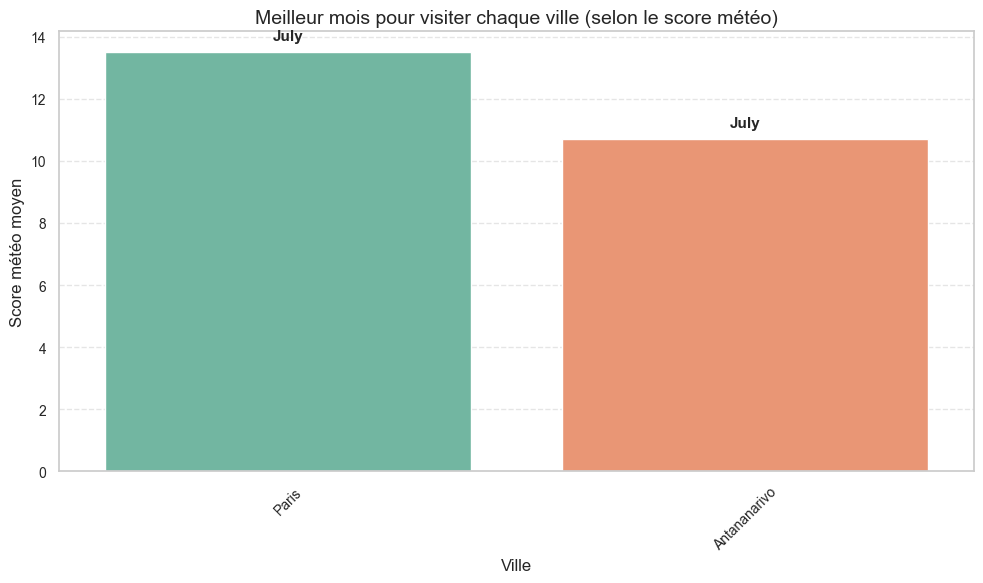

In [6]:

score_mensuel = weather_full.groupby(['City_Name', 'Month', 'Month_Name'])['Score'].mean().reset_index()

# Récupérer le meilleur mois (score max) pour chaque ville
top1_par_ville = score_mensuel.sort_values(by='Score', ascending=False).groupby('City_Name').head(1)


plt.figure(figsize=(10, 6)) 

sns.barplot(
    data=top1_par_ville,
    x='City_Name',
    y='Score',
    hue='City_Name',
    palette='Set2',
    dodge=False,
    legend=False
)

# Ajouter le nom du mois au-dessus de chaque barre
for i, row in enumerate(top1_par_ville.itertuples()):
    plt.text(i, row.Score + 0.4, row.Month_Name, ha='center', fontsize=11, fontweight='bold')

plt.title("Meilleur mois pour visiter chaque ville (selon le score météo)", fontsize=14)
plt.ylabel("Score météo moyen", fontsize=12)
plt.xlabel("Ville", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Ajuster les marges
plt.subplots_adjust(left=0.1, right=0.95, top=0.88, bottom=0.25)
plt.tight_layout()
plt.show()


## Conclusion

Nous avons identifié les mois les plus agréables pour chaque ville grâce aux scores météo, facilitant ainsi la planification de voyages au meilleur moment.
